

**Atividade - Classificação**

Base de dados: default of credit card clients Data Set
Link da base utilizada: [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

Aplicada classificação para identificar cliente que ser tornarão inadimplentes, baseado na análise de movimentações e pagamentos de faturas anteriores de cartão de crédito.

Obs: Classificação binária, possui uma variável Y, que indica se o cliente é ou não inadimplente.

|Data Set Characteristics  |Attribute Characteristics|Associated Tasks|Number of Instances|Number of Attributes|Missing Values?|Area|Date Donated|Number of Web Hits|
|--|--|--|--|--|--|--|--|--|--|
|Multivariate  |Integer, Real|Classification|30000|24|N/A|Business|2016-01-26|518949|

**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). 
X12 = amount of bill statement in September, 2005; 
X13 = amount of bill statement in August, 2005; . . .; 
X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). 
X18 = amount paid in September, 2005; 
X19 = amount paid in August, 2005; . . .;
X23 = amount paid in April, 2005

Y = Variável binária que indica se o cliente é inadimplente.

MSE: 0.22116666666666668
Acurácia: 0.7788333333333334


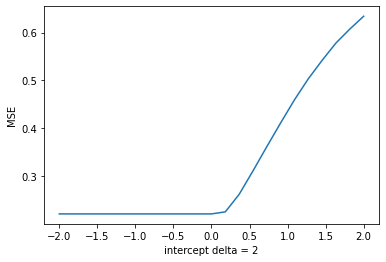

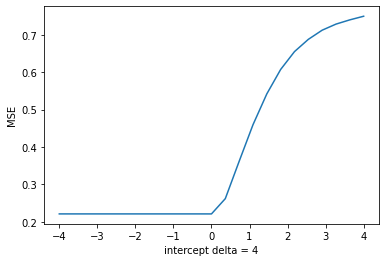

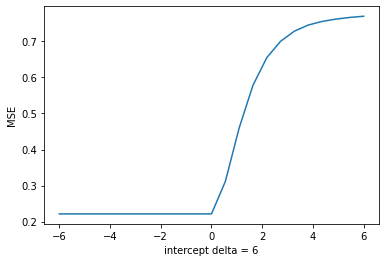

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error,accuracy_score

def erro(W0, modelo):
    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.intercept_ = W0[j][k]
            ypred = modelo.predict(X)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

#Ler Base de dados
df = pd.read_csv('cartao_credito.csv',';')

#Separando características da classificação
X,y=df.loc[1:, 'X1':'X23'],df.loc[1:,'Y']

modelo = LogisticRegression()
#Treinar Modelo com toda a base
modelo.fit(X,y)

#Predição
ypred = modelo.predict(X)

#Calcular MSE para toda a base
mse = mean_squared_error(y,ypred)

#Calcular Acuracia
acuracia = accuracy_score(y,ypred)

print(f"MSE: {mse}")
print(f"Acurácia: {acuracia}")


interceptOriginal = modelo.intercept_

for j in range(3):
    delta = 2*(j+1)
    x0 = np.linspace(interceptOriginal-delta,interceptOriginal+delta,23)
    #x0 = np.linspace(modelo.intercept_-delta,modelo.intercept_+delta,23)

    W0, W1 = np.meshgrid(x0, modelo.coef_)

    Erro = erro(W0,modelo)    

    '''Plotando o gráfico'''
    plt.ylabel("MSE")
    plt.xlabel(f"intercept delta = {delta}")
    i = 1
    plt.plot(W0[i,:],Erro[i,:])
    plt.show()
